<a href="https://colab.research.google.com/github/NataliaAraujo99/ProjetosDNC/blob/main/RID152693_Desafio05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

Uma empresa do ramo de e-commerce contratou você para levantar os
indicadores de recência, frequência e ticket médio (RFM) dos seus clientes.
A saber RFM:
R (Recency): Tempo que o cliente realizou a última compra (em dias)
F (Frequency): Quantidade de compras realizadas pelo cliente
M (Monetary): Valor do ticket médio gasto pelo cliente
onde ticket médio = média do total gasto por pedido para cada cliente.
________________________________________________________________________

**Sobre os dados**

A tabela contém informações de compras de um e-commerce em 37 países.
Contém a identificação do cliente e os dados da compra.

_________________________________________________________________________

**Coluna** Descrição

**CustomerID** Código de identificação do cliente

**Description** Descrição do produto

**InvoiceNo** Código da fatura

**StockCode** Código de estoque do produto

**Quantity** Quantidade do produto

**InvoiceDate** Data do faturamento (compra)

**UnitPrice** Preço unitário do produto

**Country** País da compra


In [ ]:
# Instalando as bibliotecas

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

!pip install sidetable pandas-profiling missingno ipywidgets
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform


In [ ]:
#Carregando o Dataset

df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Analisando a estatística descritiva

df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#Informações sobre a base de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Identificar valores duplicados
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
# Identificar quantos valores duplicados há em cada duplicata
(
  df
 .groupby(df.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)
 .head(5)
)

n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
541266    21755     LOVE BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
572344    M         Manual                              48       10/24/2011 10:43 1.50      14607.0    United Kingdom             6

In [ ]:
# Remove duplicatas e mantém apenas a primeira ocorrência de cada linha duplicada
df = df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [ ]:
# Verificar quantas linhas tem com o preço unitário menor ou igual a 0
Preco_unitario = df[df['UnitPrice'] <= 0].shape[0]
print(Preco_unitario)


2512


In [ ]:
# Filtra as linhas onde o preço é menor ou igual a 0
tabela_filtrada = df[df['UnitPrice'] <= 0]

# Exibe a tabela filtrada
tabela_filtrada


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,12/8/2011 14:06,0.0,NaN,United Kingdom


In [ ]:
# Remover as linhas onde o preço é menor ou igual a 0
df = df[df['UnitPrice'] > 0]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 534129 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    534129 non-null  object 
 1   StockCode    534129 non-null  object 
 2   Description  534129 non-null  object 
 3   Quantity     534129 non-null  int64  
 4   InvoiceDate  534129 non-null  object 
 5   UnitPrice    534129 non-null  float64
 6   CustomerID   401564 non-null  float64
 7   Country      534129 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.7+ MB


In [ ]:
# Identificar e mostrar valores nulos
df_missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)

df_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_count,missing_pct
CustomerID,132565,24.82%
InvoiceNo,0,0.00%
StockCode,0,0.00%
Description,0,0.00%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
Country,0,0.00%


In [ ]:
# Substitui valores nulos na coluna 'CustomerID' por 'nan' (como string)
df['CustomerID'] = df['CustomerID'].fillna('nan')

# Filtra as linhas onde CustomerID é 'nan'
tabela_nan = df[df['CustomerID'] == 'nan']

# Exibe a tabela filtrada
print(tabela_nan)


       InvoiceNo StockCode                      Description  Quantity  \
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
1447      536544     21790               VINTAGE SNAP CARDS         9   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

            InvoiceDate  UnitPrice CustomerID         Country  
1443    12/1/2010 14:32       2.51        nan  United Kingd

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534129 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    534129 non-null  object 
 1   StockCode    534129 non-null  object 
 2   Description  534129 non-null  object 
 3   Quantity     534129 non-null  int64  
 4   InvoiceDate  534129 non-null  object 
 5   UnitPrice    534129 non-null  float64
 6   CustomerID   534129 non-null  object 
 7   Country      534129 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 36.7+ MB


In [ ]:
# Convertendo a coluna InvoiceDate para datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Convertendo a coluna CustomerID para int, tratando valores ausentes
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce').fillna(0).astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 534129 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    534129 non-null  object        
 1   StockCode    534129 non-null  object        
 2   Description  534129 non-null  object        
 3   Quantity     534129 non-null  int64         
 4   InvoiceDate  534129 non-null  datetime64[ns]
 5   UnitPrice    534129 non-null  float64       
 6   CustomerID   534129 non-null  int64         
 7   Country      534129 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 36.7+ MB


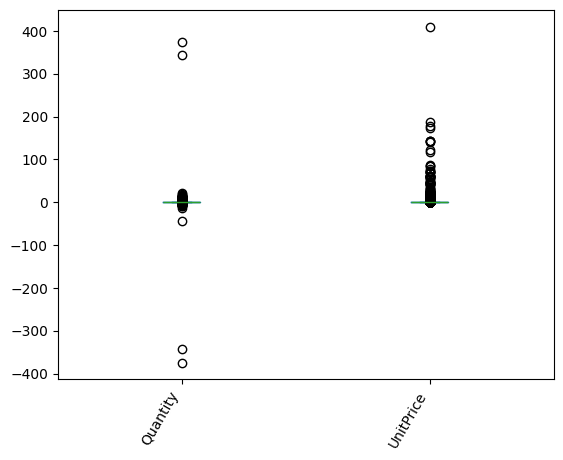

In [ ]:
# Selecionar apenas as colunas 'Quantity' e 'UnitPrice'
df_selected = df[['Quantity', 'UnitPrice']]

# Aplicar a função scale nas colunas selecionadas e criar o box plot
df_selected.apply(scale).plot.box()
plt.xticks(rotation=60, ha='right')
plt.show()

In [ ]:
# Filtrar para remover os outliers extremos
df_sem_outliers_extremos = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] <= 5000)]

# Exibir o DataFrame sem os outliers extremos
print("DataFrame sem outliers extremos:")
print(df_sem_outliers_extremos)

DataFrame sem outliers extremos:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cus

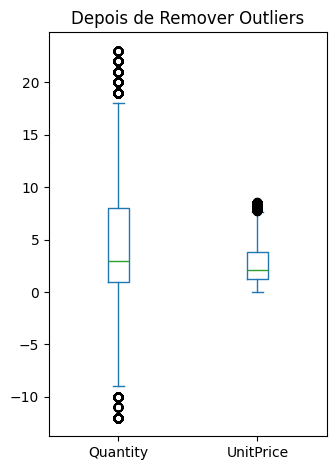

In [ ]:
# Depois de excluir os outliers
plt.subplot(1, 2, 2)
df_sem_outliers[['Quantity', 'UnitPrice']].plot.box(ax=plt.gca())
plt.title("Depois de Remover Outliers")

plt.tight_layout()
plt.show()

In [ ]:
# Criar a coluna 'TotalPrice' com o preço total da compra
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Exibir as primeiras linhas para conferir
print(df[['Quantity', 'UnitPrice', 'TotalPrice']].head())


   Quantity  UnitPrice  TotalPrice
0         6       2.55       15.30
1         6       3.39       20.34
2         8       2.75       22.00
3         6       3.39       20.34
4         6       3.39       20.34


In [ ]:

# Calcular a data da última compra (max())
ultima_compra = df['InvoiceDate'].max()

# Exibir a data da última compra
print("Data da última compra:", ultima_compra)


Data da última compra: 2011-12-09 12:50:00


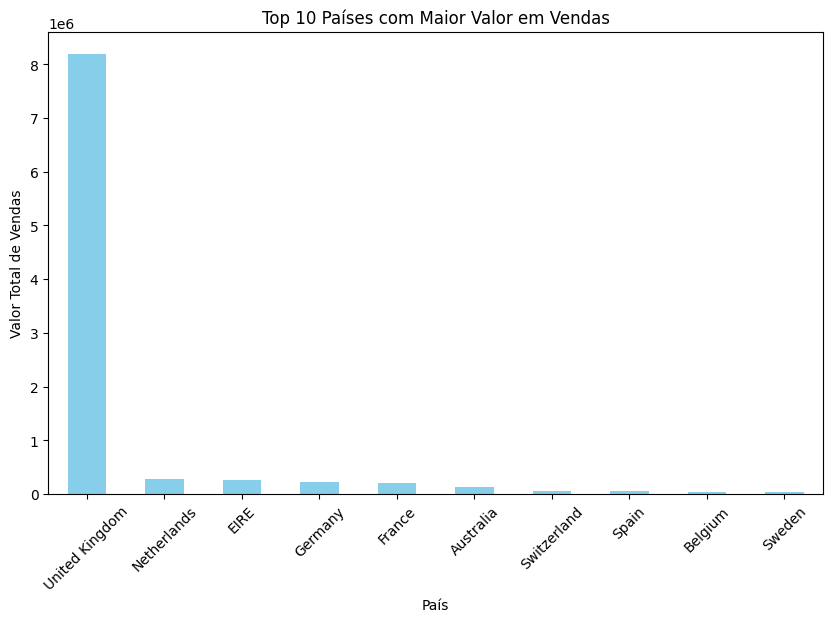

In [ ]:
# Agrupar os dados por país e somar o total de vendas
vendas_por_pais = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plotar gráfico de barras
vendas_por_pais.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xlabel('País')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45)
plt.show()

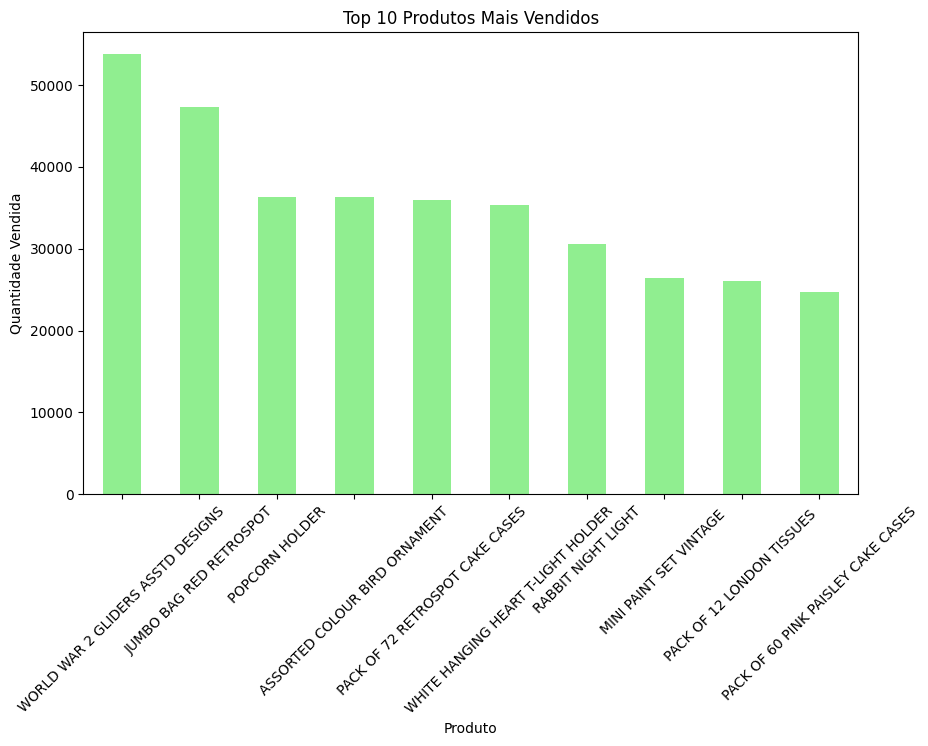

In [ ]:
# Agrupar os dados por produto e somar a quantidade vendida
produtos_mais_vendidos = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plotar gráfico de barras
produtos_mais_vendidos.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()

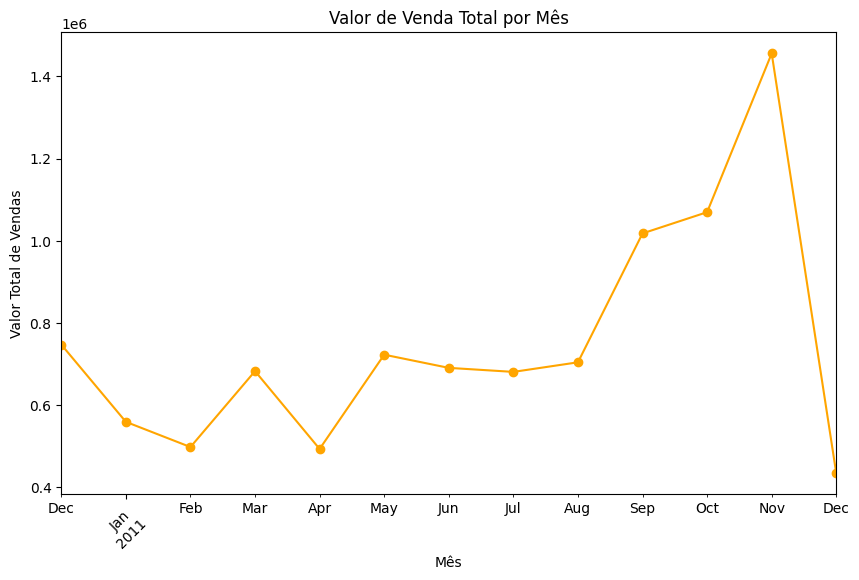

In [ ]:
# Criar uma nova coluna com o mês e ano da venda
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Agrupar por mês e somar o total de vendas
vendas_por_mes = df.groupby('Month')['TotalPrice'].sum()

# Plotar gráfico de linhas
vendas_por_mes.plot(kind='line', figsize=(10, 6), color='orange', marker='o')
plt.title('Valor de Venda Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45)
plt.show()

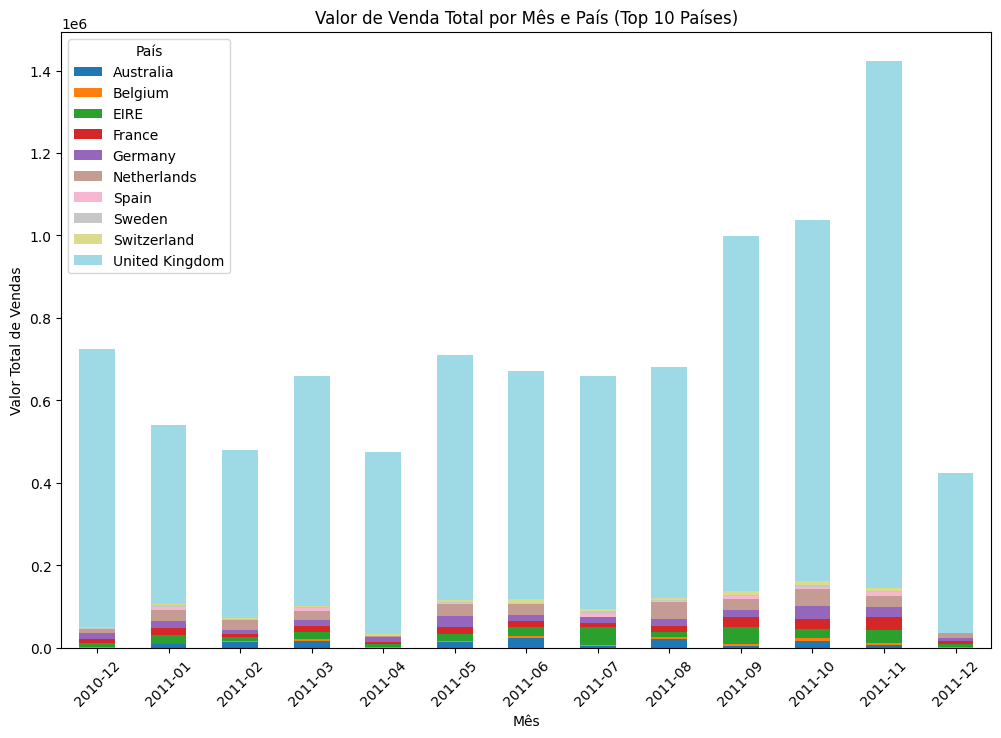

In [ ]:
# Selecionar os top 10 países
top_10_paises = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).index

# Filtrar o DataFrame para conter apenas os top 10 países
df_top_10_paises = df[df['Country'].isin(top_10_paises)]

# Agrupar por mês e país, somando o total de vendas
vendas_por_mes_pais = df_top_10_paises.groupby(['Month', 'Country'])['TotalPrice'].sum().unstack()

# Plotar gráfico de barras empilhadas
vendas_por_mes_pais.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Valor de Venda Total por Mês e País (Top 10 Países)')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45)
plt.legend(title='País')
plt.show()

In [ ]:
# Agrupar os dados por cliente e pedido (InvoiceNo), somando o valor total da compra
df_cliente_pedido = df.groupby(['CustomerID', 'InvoiceNo']).agg(
    DataUltimaCompra=('InvoiceDate', 'max'),
    ValorTotalPedido=('TotalPrice', 'sum')
).reset_index()

# Calcular a recência (R) para cada cliente (diferença entre a última compra e a data da última compra do dataset)
df_cliente_pedido['Recencia'] = (ultima_compra - df_cliente_pedido['DataUltimaCompra']).dt.days

# Agrupar por cliente para calcular F (frequência) e M (monetário)
df_cliente_RFM = df_cliente_pedido.groupby('CustomerID').agg(
    Frequencia=('InvoiceNo', 'nunique'),        # Contar número de compras únicas
    TicketMedio=('ValorTotalPedido', 'mean'),   # Calcular a média do valor total das compras
    Recencia=('Recencia', 'min')                # Recência é a mínima, pois queremos a última compra
).reset_index()

# Exibir os primeiros resultados
print(df_cliente_RFM.head())


   CustomerID  Frequencia  TicketMedio  Recencia
0           0        1610   912.802267         0
1       12346           2     0.000000       325
2       12347           7   615.714286         1
3       12348           4   449.310000        74
4       12349           1  1757.550000        18


# Análise do resultado


***1. CustomerID 0***

Frequência: 1610 compras
Ticket Médio: 912.80
Recência: 0 dias (última compra foi hoje)

**Análise:**

Este cliente é extremamente ativo, com 1610 compras. Ele tem uma frequência de compras muito alta, a recência é 0, indicando que ele fez a última compra hoje. Esse cliente provavelmente é um dos principais clientes da base, com uma boa relação de fidelidade e gasto médio significativo.

.
.
.

***2. CustomerID 12346***

Frequência: 2 compras
Ticket Médio: 0.00
Recência: 325 dias (última compra foi há 325 dias)

**Análise:**

Este cliente tem uma frequência muito baixa (2 compras), mas o ticket médio é 0, o que sugere que as compras realizadas por esse cliente podem ser registros com valor zero (possível erro de registro ou devoluções).

.
.
.

***3. CustomerID 12347***

Frequência: 7 compras
Ticket Médio: 615.71
Recência: 1 dia (última compra foi há 1 dia)
Análise:

Este cliente fez 7 compras, com um ticket médio moderado de 615,71. A recência de 1 dia indica que a última compra foi feita recentemente. Isso sugere que esse cliente ainda está ativo e comprando com certa frequência, o que é positivo.

.
.
.

***4. Cliente 12348***

Frequência: 4 compras
Ticket Médio: 449.31
Recência: 74 dias (última compra foi há 74 dias)
Análise:

Este cliente fez 4 compras e possui um ticket médio razoável de 449,31. A recência de 74 dias indica que ele não comprou recentemente, mas ainda não está completamente inativo.

.
.
.

***5. Cliente 12349***

Frequência: 1 compra
Ticket Médio: 1757.55
Recência: 18 dias (última compra foi há 18 dias)
Análise:

Este cliente fez apenas 1 compra, mas o ticket médio é muito alto (1757,55), indicando que o valor dessa compra foi significativo. A recência de 18 dias sugere que o cliente pode ser um comprador esporádico, mas com um gasto significativo. Estratégias de retenção podem ser úteis para incentivá-lo a comprar mais frequentemente.
